In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image & Mask

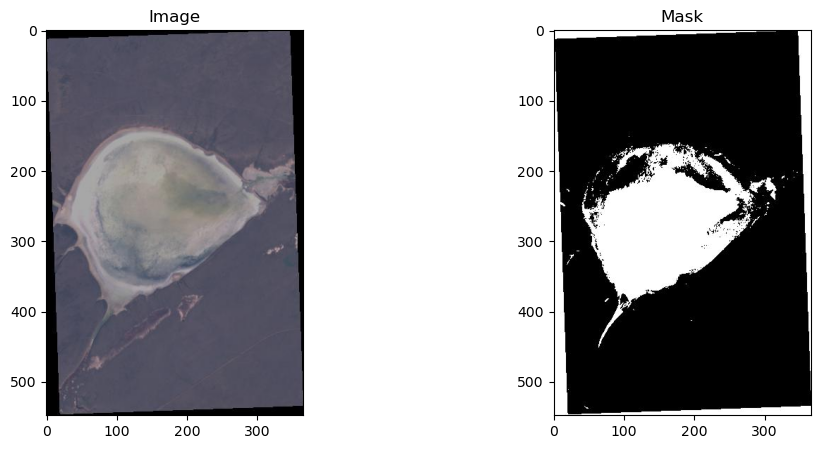

In [2]:
img = cv2.imread("SET-2/water_body.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread("SET-2/water_body_Masked.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")

plt.show()

### Thresholding

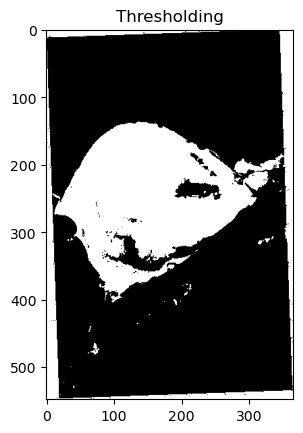

In [3]:
THRESH = 120

img = cv2.imread("SET-2/water_body.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.where(img > 10, img, 255)

_, t_mask = cv2.threshold(img, THRESH, 255, cv2.THRESH_BINARY)

plt.title("Thresholding")
plt.imshow(t_mask, cmap="gray")

### Segmentation K-Means

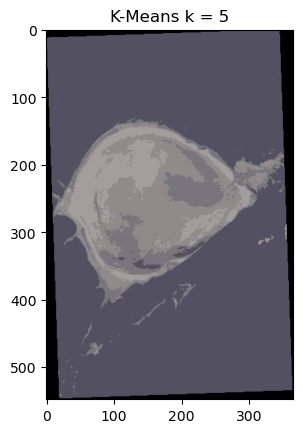

In [4]:
from sklearn.cluster import KMeans

img = cv2.imread("SET-2/water_body.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

vector = img.reshape((-1, 3))

kmeans = KMeans(n_clusters=5, random_state=69, n_init=5)
kmeans.fit(vector)

centroids = kmeans.cluster_centers_.astype(np.uint8)

seg_img = centroids[kmeans.labels_.flatten()]
seg_img = seg_img.reshape(img.shape)

plt.title("K-Means k = 5")
plt.imshow(seg_img, cmap="gray")
plt.show()

centroids.sort(axis=0)

g_mask = np.zeros(img.shape).astype(np.uint8)
for c in centroids[3:5]:
    l_mask = np.where(seg_img == c, 255, 0).astype(np.uint8)
    g_mask |= l_mask

g_mask = g_mask.astype(np.float32)
r_mask = np.where(seg_img == centroids[0], 255, 0).astype(np.float32)

g_mask = cv2.cvtColor(g_mask, cv2.COLOR_BGR2GRAY)
r_mask = cv2.cvtColor(r_mask, cv2.COLOR_BGR2GRAY)

### Morphological Transformations

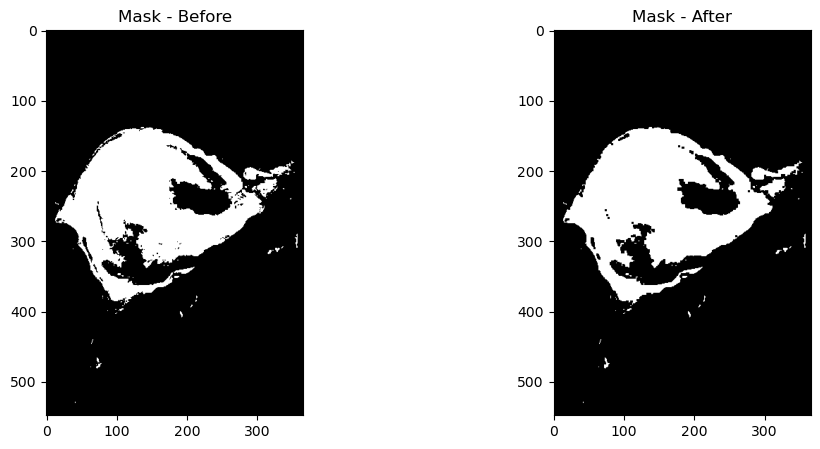

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Mask - Before")
plt.imshow(g_mask, cmap="gray")

kernel = np.ones((3,3),np.uint8)
g_mask = cv2.morphologyEx(g_mask, cv2.MORPH_CLOSE, kernel)

plt.subplot(1, 2, 2)
plt.title("Mask - After")
plt.imshow(g_mask, cmap="gray")

plt.show()

### Metrics

In [6]:
import numpy as np

def dice_coefficient(mask1, mask2):
    intersection = np.sum(mask1 * mask2)
    return 2 * intersection / (np.sum(mask1) + np.sum(mask2))

def iou(mask1, mask2):
    intersection = np.sum(mask1 * mask2)
    union = np.sum(mask1) + np.sum(mask2) - intersection
    return intersection / union

def accuracy(mask1, mask2):
    true_positives = np.sum(mask1 * mask2)
    true_negatives = np.sum((1 - mask1) * (1 - mask2))
    false_positives = np.sum(mask1) - true_positives
    false_negatives = np.sum(mask1) - true_positives
    return (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

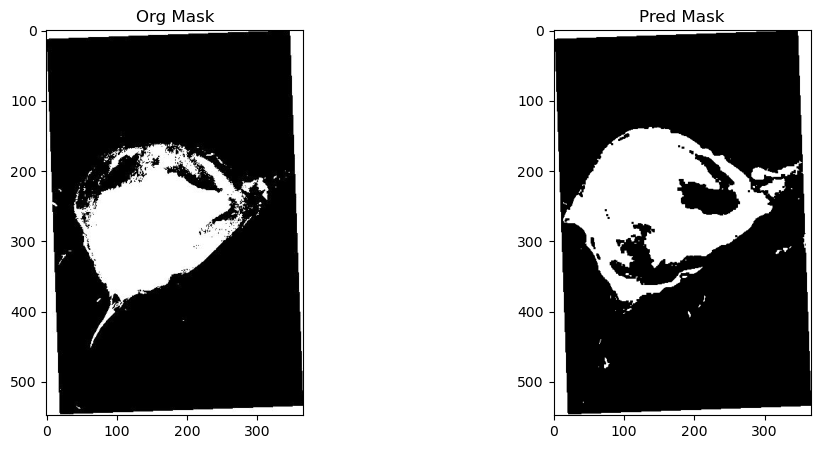

In [7]:
org_mask = cv2.imread("SET-2/water_body_Masked.jpg")
org_mask = cv2.cvtColor(org_mask, cv2.COLOR_BGR2GRAY)

THRESH = 127
g_mask = cv2.threshold(g_mask, THRESH, 255, cv2.THRESH_BINARY)[1].astype(np.uint8)
r_mask = cv2.threshold(r_mask, THRESH, 255, cv2.THRESH_BINARY)[1].astype(np.uint8)

pred_mask = np.bitwise_or(g_mask, r_mask)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Org Mask")
plt.imshow(org_mask, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Pred Mask")
plt.imshow(pred_mask, cmap="gray")

plt.show()

### Result

#### Thresholding

In [8]:
org_mask //= 255
t_mask //= 255

print("Dice Coefficient : ", dice_coefficient(org_mask, t_mask))
print("IOU : ", iou(org_mask, t_mask))
print("Accuracy : ", accuracy(org_mask, t_mask))

Dice Coefficient :  0.7285724396631043
IOU :  0.5730349588065019
Accuracy :  0.9515679347081861


#### K-Means

In [9]:
pred_mask //= 255

print("Dice Coefficient : ", dice_coefficient(org_mask, pred_mask))
print("IOU : ", iou(org_mask, pred_mask))
print("Accuracy : ", accuracy(org_mask, pred_mask))

Dice Coefficient :  0.6946439742013417
IOU :  0.5321490539535653
Accuracy :  0.9126145695364238
